# Objective Analysis Homework 2 (Aspen Morgan)
**Collaborated with:**

**Expected time to complete:** 6 hours

**Maximum time to complete:** 9 hours

**Actual time to complete:** 8 hours

## Problem 1: Testing composite-averages using bootstrapping and the t/z-test

You’ve been living in Fort Collins for a while now, and you think that the air pressure acts “oddly” when it is raining. That is, the pressure is either anomalously high or low at times when there is measurable precipitation (more than 0 inches). To test your hypothesis, you have hourly observations at Christman field
over 2014. Specifically, you have precipitation amount (R) in units of inches (homework 2 data R.csv) and pressure (P) in units of hPa (homework 2 data P.csv).

**Hint for bootstrapping:** Say there are N hourly periods when R>0. Instead of averaging the pressure P in those N hours, randomly grab
N pressure values and take their average. Then do this again, and again, and again... In the end, you will end up
with the distribution of the mean of N pressures ($\overline{P}_{N}$) in the case of random sampling, i.e. the distribution you would
expect if there was no physical relationship between P and R. Now, you can use this distribution to put your answer
to (a) into context. That is, you can now quantify the likelihood of getting your value of $\overline{P_{R> 0}}$ by chance alone using
percentiles of the distribution of $\overline{P}_{N}$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
r = pd.read_csv('/content/drive/MyDrive/Classes/OA/HW2/homework_2_data_R.csv').values.flatten()
p = pd.read_csv('/content/drive/MyDrive/Classes/OA/HW2/homework_2_data_P.csv').values.flatten()
data = pd.DataFrame({'R': r, 'P': p})

In [3]:
len(p)

8759

### Part (a)
What was the average pressure in 2014 (P)? What was the average pressure when it rained (PR>0)?

In [ ]:
p.mean()

846.3326544126041

In [ ]:
p2 = data[data.R > 0].P
p2.mean()

847.030625

The average pressure in 2014 was 846.33 hPa and the average pressure when it rained was 847.03 hPa.

### Part (b)
Using a t/z-test, employ a standard hypothesis test to determine whether the local pressure is anomalously high or low during times when it is precipitating (R>0). Describe all of your steps. Do you think that a t-test/z-test is appropriate in this situation?

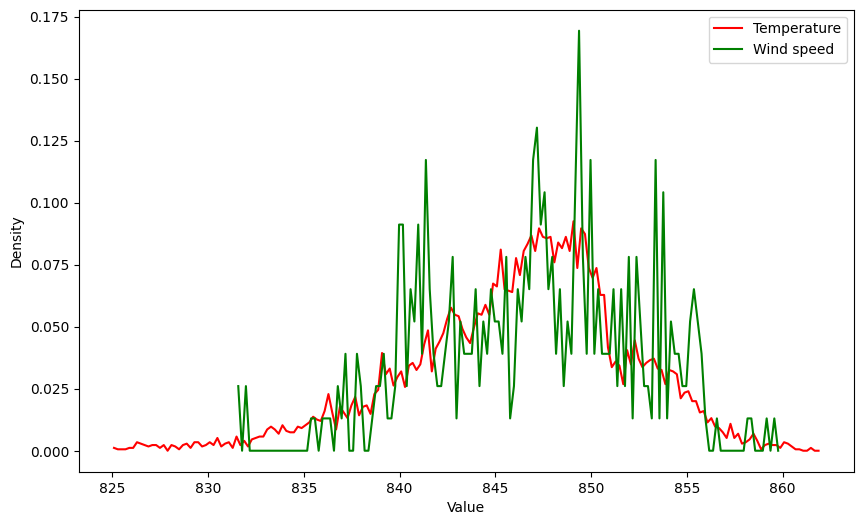

In [ ]:
# plot the distributions
xinc = 0.2
p_bins = np.arange(p.min(), p.max(), xinc)
p2_bins = np.arange(p2.min(), p2.max(), xinc)

h1 = np.histogram(p, p_bins)
h2 = np.histogram(p2, p2_bins)

f1 = h1[0].astype(float)/(np.size(p)*xinc)
f2 = h2[0].astype(float)/(np.size(p2)*xinc)

# plot pdf estimate
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(h1[1][:-1], f1, 'r', label = 'Temperature')
ax.plot(h2[1][:-1], f2, 'g', label = 'Wind speed')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend();
# plt.savefig('fig1.png')

In [ ]:
# N1 = len(data)
# N2 = len(data[data.R > 0])
# sigma1 = data.P.std(ddof=1)
# sigma2 = data[data.R > 0].P.std(ddof=1)
# z = -1*(p.mean() - p2.mean())/np.sqrt(((sigma1**2)/N1)+((sigma2**2)/N2))
# z

In [ ]:
N = len(p2)
sigma = p.std()
z = (p2.mean()-p.mean())/(sigma/np.sqrt(N))
z

2.4349481174347187

In [ ]:
# prob of z < 2.48 = 0.9934
2*(1-stats.norm.cdf(z))

0.014893925075851522

Let $H_0:=$"the local pressure distribution is the same with and without precipitation" and let $\alpha = 0.05$ since I'm not super worried about false positives and I expect a relationship between pressure and precipitation. Since I would normally associate low pressure with precipitation, I will use a two-tailed test. To test $Pr(\overline{P}_{R>0}|H_0)$, I used use a z-test following the central limit theorem since the total number of pressure samples ($N$) is much greater than 30.

I used equation 1.63, $z=(\overline{x}-\mu)/(\sigma/\sqrt{N})$ where $\mu$ and $\sigma$ are for the whole population and $\overline{x}$ is for pressure during precipitation. Thus, $z=2.43$ and $Pr(z>2.43 \cup z<-2.43)=p=0.01$. Since $p<\alpha$, I can reject the null hypothesis.

### Part (c)
Instead of the t/z-test, use bootstrap sampling to determine whether the local pressure is anomalously high or low during times when it is precipitating. How does your answer compare with your results from Part (b)? What does this tell you about your conclusion in Part (b)?

I completed 100,000 bootstrapped experiments with $N=384$.

In [ ]:
cumsum = 0
sample_means = 0.0*np.zeros(100_000)
for i in range(100_000):
  samples = np.random.choice(np.squeeze(p), 384)
  sample_means[i] = samples.mean()
  if samples.mean() > p2.mean():
    cumsum += 1
cumsum/100_000

0.00682

In [ ]:
0.00682*100

0.6819999999999999

In [ ]:
sample_means.min()

0.0

In [ ]:
sample_means.mean() - (1.96*sample_means.std()/np.sqrt(384))

0.0

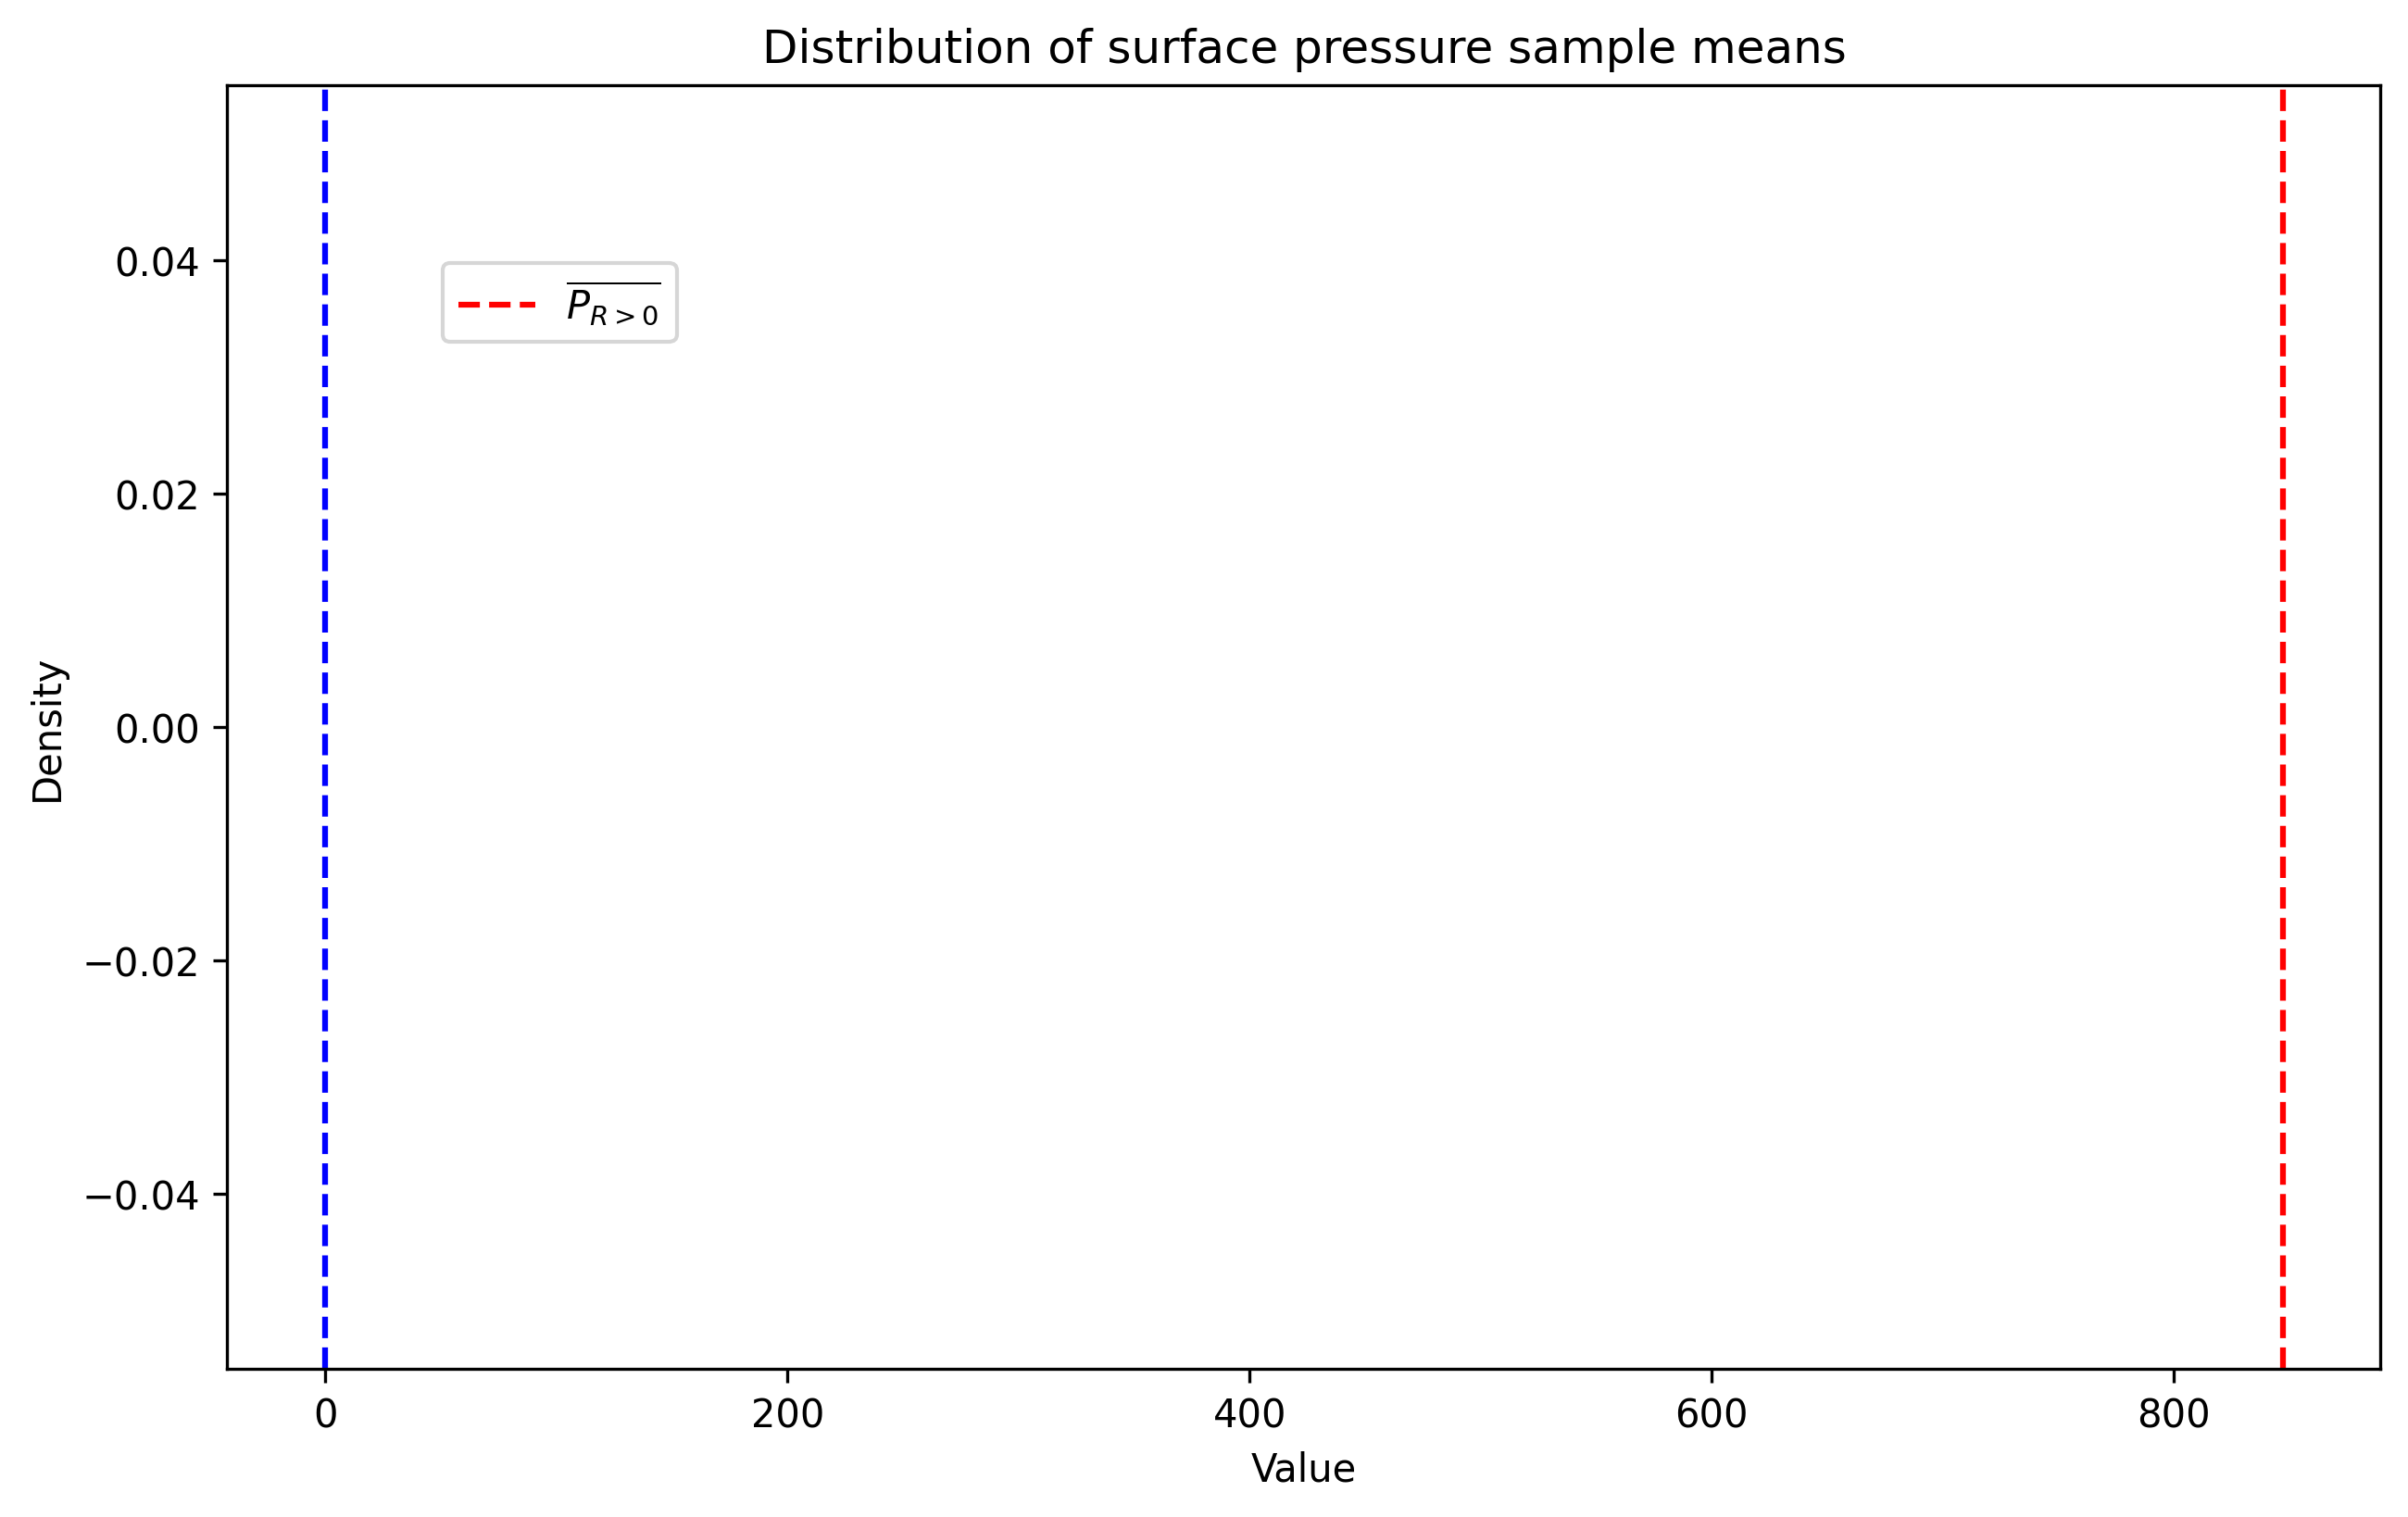

In [ ]:
# create histogram
hist = np.histogram(sample_means, np.arange(sample_means.min(), sample_means.max(), 0.2))

# convert to density
f = (hist[0])/(len(sample_means)*0.2)

# confidence intervals
upper = sample_means.mean() + (1.96*sample_means.std()/np.sqrt(384))
lower = sample_means.mean() - (1.96*sample_means.std()/np.sqrt(384))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=300)
ax.plot(hist[1][:-1], f, 'k')
ax.axvline(p2.mean(), linestyle='--', color='r', label='$\overline{P_{R>0}}$')
ax.axvline(upper, linestyle='--', color='b')
# ax.axvline(lower, linestyle='--', color='b')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc=(0.1, 0.8))
plt.title('Distribution of surface pressure sample means');
plt.savefig('fig1.png')

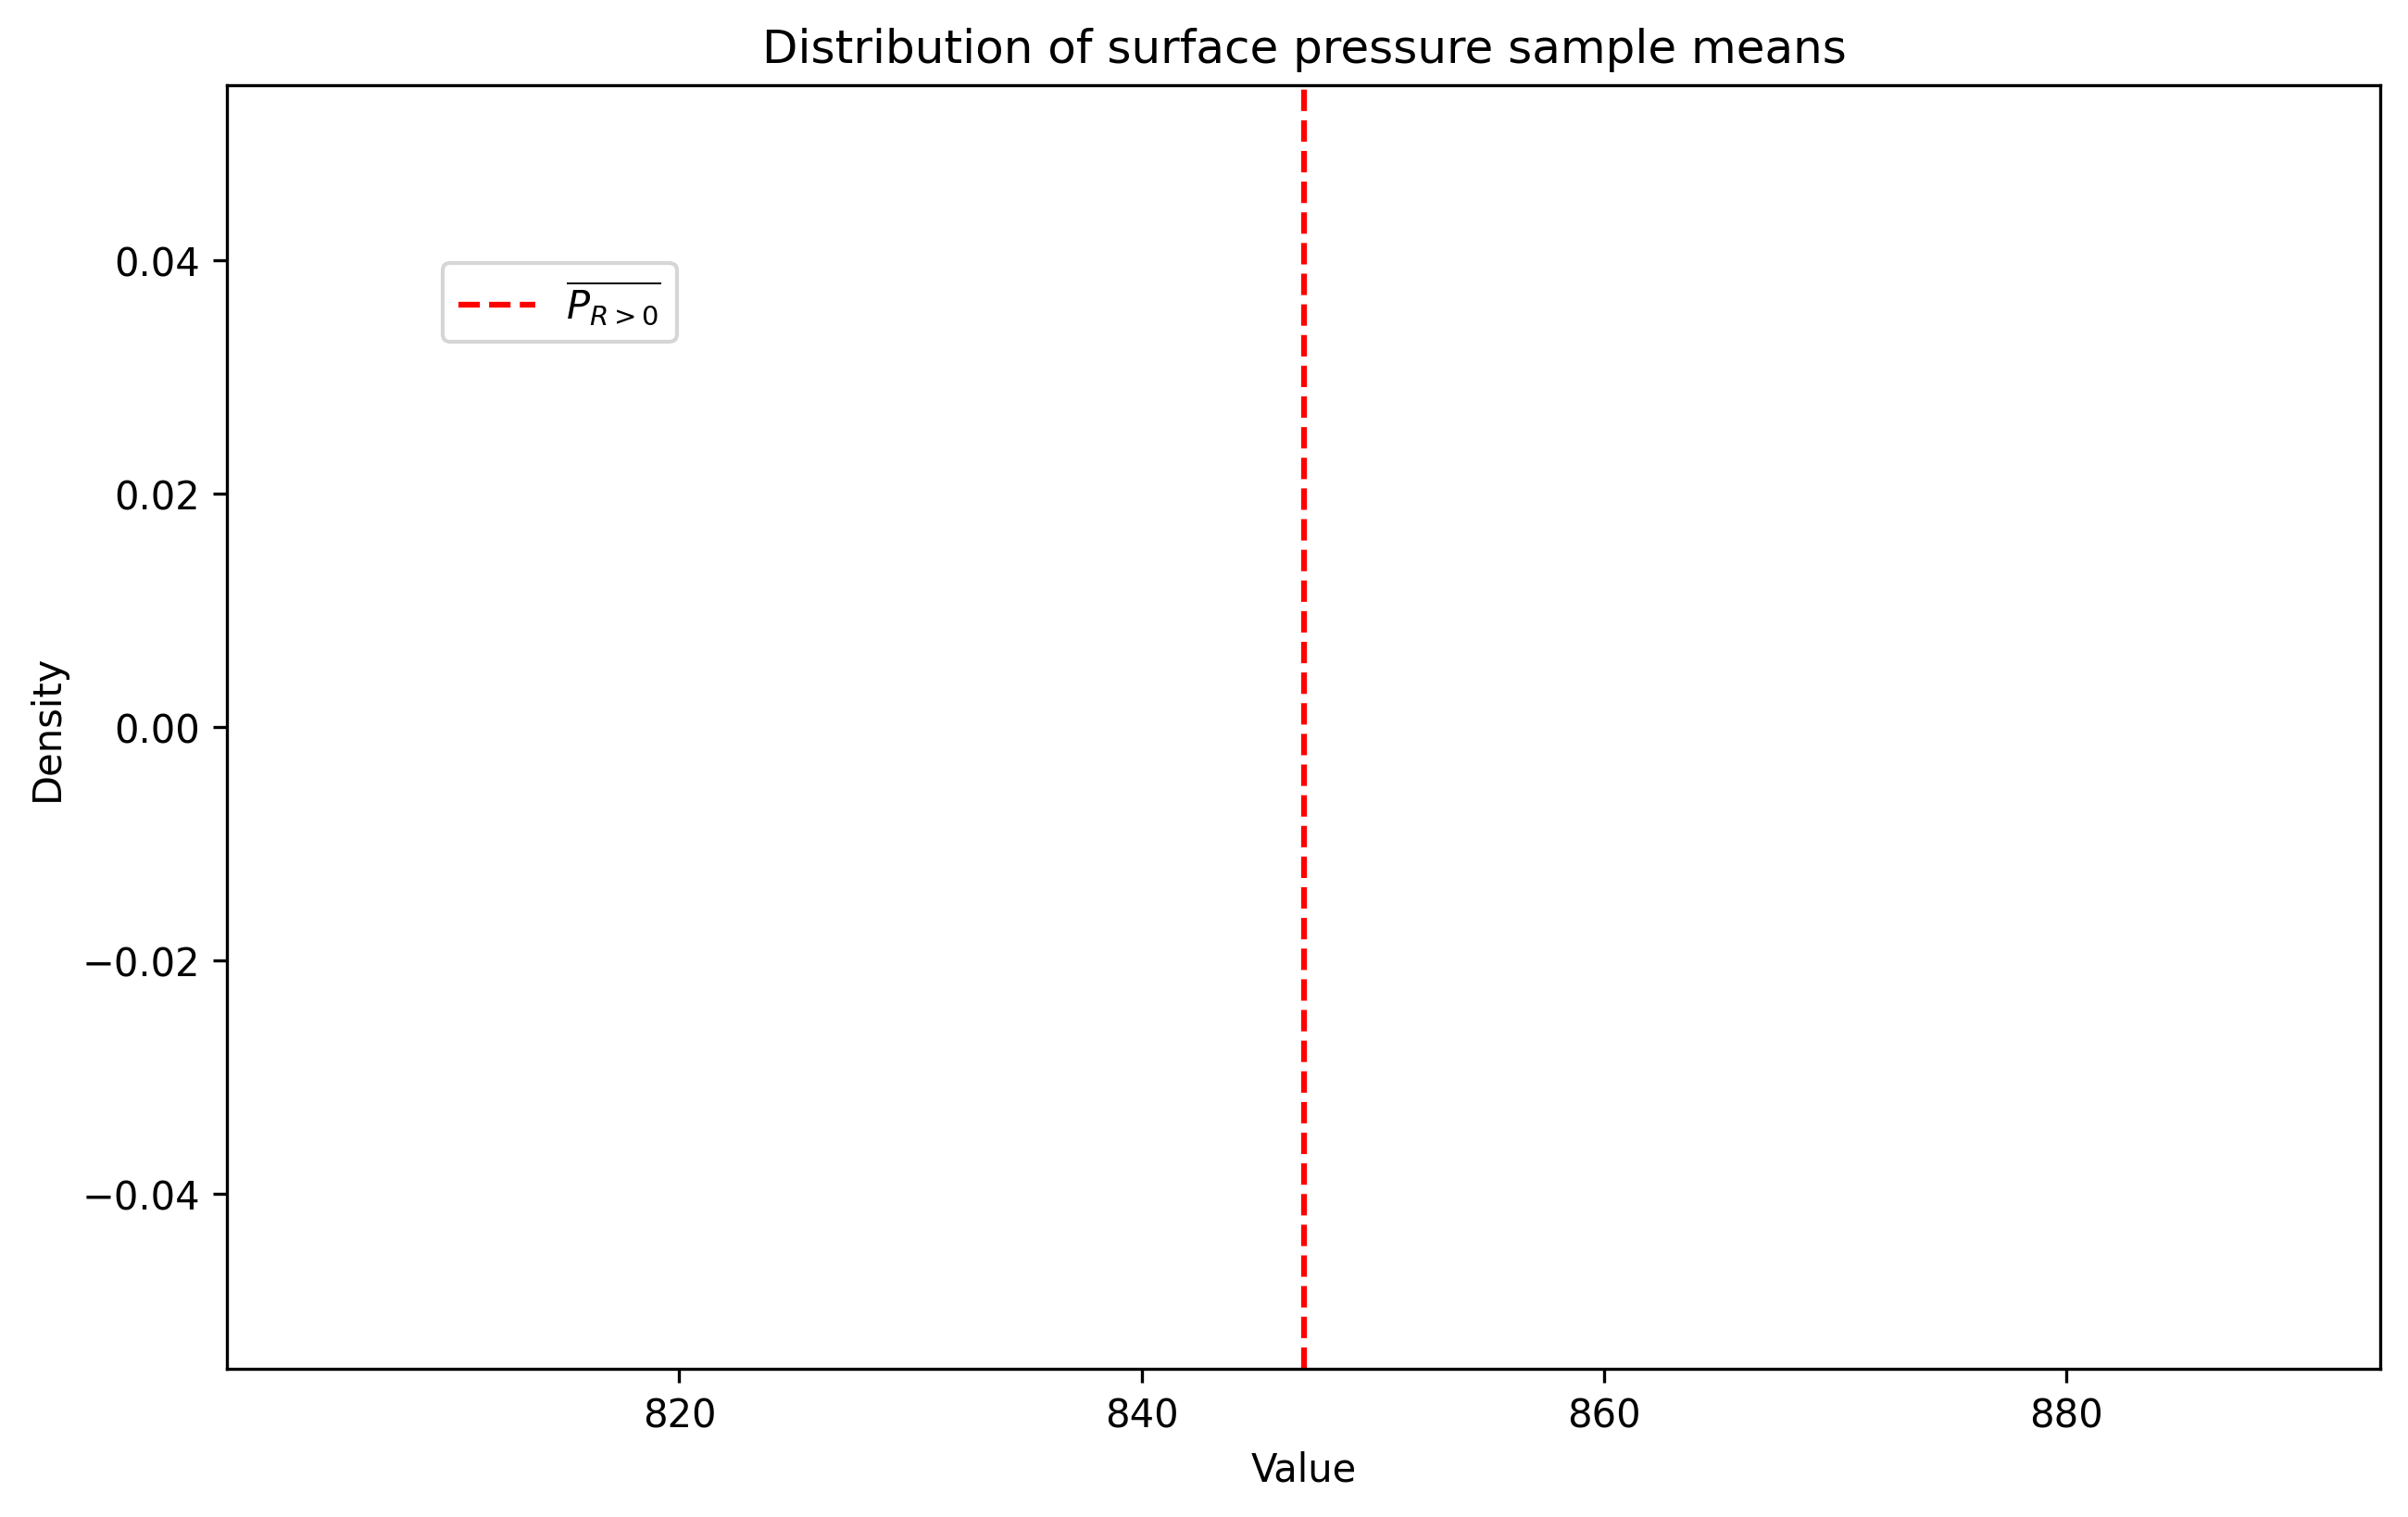

In [ ]:
# Standardize
hist = np.histogram(sample_means, np.arange(sample_means.min(), sample_means.max(), 0.2))

# convert to density
f = (hist[0])/(len(sample_means)*0.2)

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=300)
ax.plot(hist[1][:-1], f, 'k')
ax.axvline(p2.mean(), linestyle='--', color='r', label='$\overline{P_{R>0}}$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc=(0.1, 0.8))
plt.title('Distribution of surface pressure sample means');
plt.savefig('fig1.png')

In [ ]:
z3 = (p2.mean()-sample_means.mean())/(sample_means.std()/np.sqrt(len(sample_means)))
print(z3)
prob = 2*(1-stats.norm.cdf(z3))
prob

inf


<ipython-input-301-5624b63b0744>:1: RuntimeWarning: divide by zero encountered in scalar divide
  z3 = (p2.mean()-sample_means.mean())/(sample_means.std()/np.sqrt(len(sample_means)))


0.0

The distribution in Figure 1 validates my answer from Part (b). Although it's possible that the null hypothesis is true, it's likely that the elevated average pressure during precipitation events is not simply a part of internal variability.

## Problem 2: Bayesian vs Frequentist

You have a measurement station on the roof of the CSU Atmospheric Science building that measures wind
direction and the concentration of Nitrogen (C) in the air. You know from many years of measurements
that winds from the east (E) flow over the Greeley feedlots and the air that arrives at your instrument has
anomalous Nitrogen concentrations that follow a normal distribution with mean $\mu_{E} = 0.2$ and $\sigma_{E} = 1$. On
the other hand, winds from the west (W) bring relatively pristine air from the mountains and that air has
anomalous Nitrogen concentrations that follow a **normal distribution** with mean $\mu_{W} = 0.0$ and $\sigma_{W} = 1.$
But wait! You have a problem. You just went to check on your instrument, and you found that it is no
longer recording the hourly wind direction or the concentrations! Due to glitch in the software, all you know
is that the average Nitrogen concentration of the air over the past 100 samples was $\overline{C_{100}}$ = 0.13. Do you
think the wind over the last 100 samples was from the east or the west?

### Part (a)
Use hypothesis testing, can you reject the null hypothesis that the air is actually pristine air from the west $(H_0 : µ= 0)$? Use a two-tailed confidence interval of 95%.

Since we are estimating the rarity of a sample mean with over 30 samples, I used a z-test with $\overline{x}=0.13$. I calculated a $z=1.3$ and $p=0.19$ for getting a mean more extreme than |0.13| extreme under a two tailed test. And since $0.19>0.05$, the null hypothesis cannot be rejected.

In [ ]:
def get_freq_prob(C, N=100):
  z = C*np.sqrt(N)
  return 2*(1-stats.norm.cdf(np.abs(z)))

In [ ]:
get_freq_prob(0.13)

0.1936009691712206

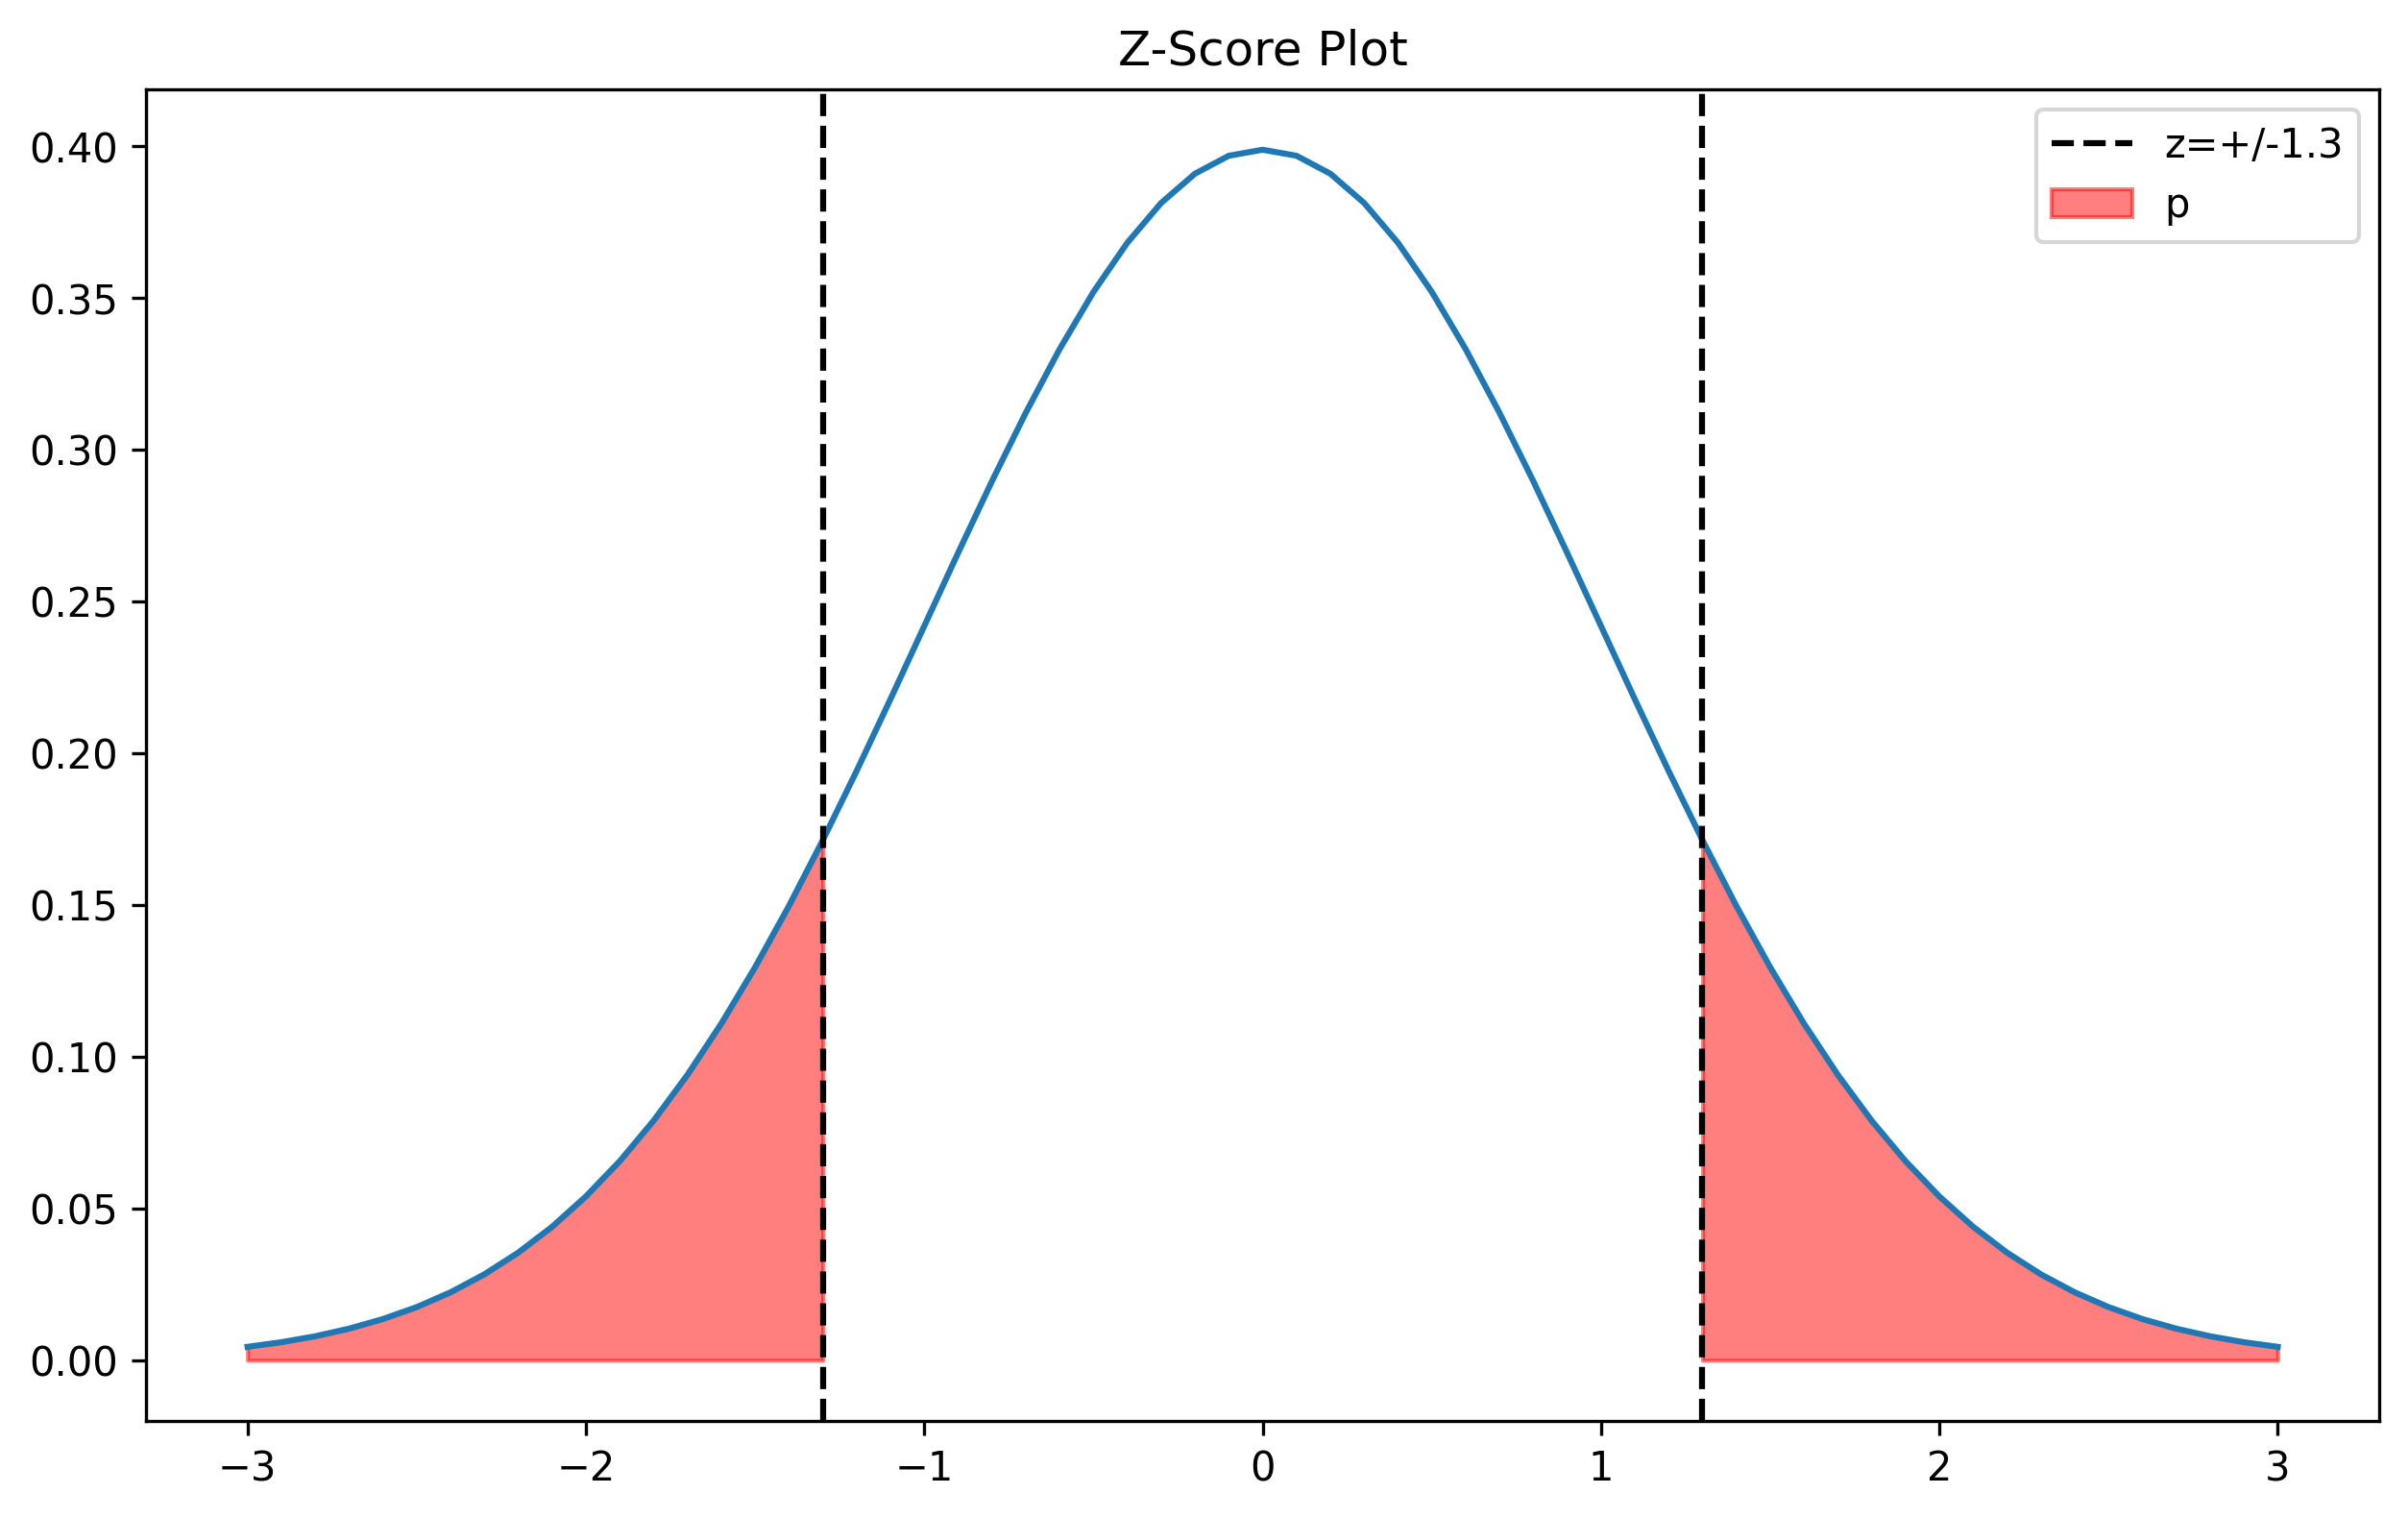

In [ ]:
afig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=300)
x = np.arange(-3, 3.1, 0.1)
x1 = np.arange(-3, -1.2, 0.1)
x2 = np.arange(1.3, 3.1, 0.1)
ax.plot(x, stats.norm.pdf(x, loc=0, scale=1))
ax.axvline(1.3, c='k', linestyle='--', label='z=+/-1.3')
ax.axvline(-1.3, c='k', linestyle='--')
ax.fill_between(x1, stats.norm.pdf(x1, loc=0, scale=1), np.zeros(len(x1)), color='r', alpha=0.5, label='p')
ax.fill_between(x2, stats.norm.pdf(x2, loc=0, scale=1), np.zeros(len(x2)), color='r', alpha=0.5)
ax.legend()
ax.set_title('Z-Score Plot');
fig.savefig('fig2.png')

### Part (b)
You start discussing your issue with a graduate student in the department. They don’t know which way
the wind was recently blowing, but they do point you toward the Iowa Environmental Mesonet website
which provides information about the annual-mean wind directions (see Figure 1). Analyzing the wind rose
information, you see that the winds blow out of the west (between SW and NW) 40% of the time and that
the winds blow out of the east (between NE and SE) 60% of the time.
Let $\gamma$ denote the fraction of time the air comes from the west (so, $\gamma= 0.4$). Use Bayes’ Theorem to compute
the probability that the air came from the west over your 100-sample period.

**Hint 1:** If the Bayes formulation says the probability that the winds were out of the west is greater than 50%, assume that
the winds were out of the west. If the probability is less than 50%, assume the winds were out of the east.

**Hint 2:** Although the problem is formulated as $Pr(W|\overline{C_{100}}=0.13)$ , we can't actually test for $\overline{C_{100}}=0.13$ since the
probability of getting any one value is always zero. Thus, we will instead re-formulate the question as follows: what
is the probability that the winds were out of the west given a mean Nitrogen concentration of $\overline{C_{100}}$ within $\delta$ of 0.13?
That is, $Pr(W|0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta$). For this homework, let δ= 0.01.

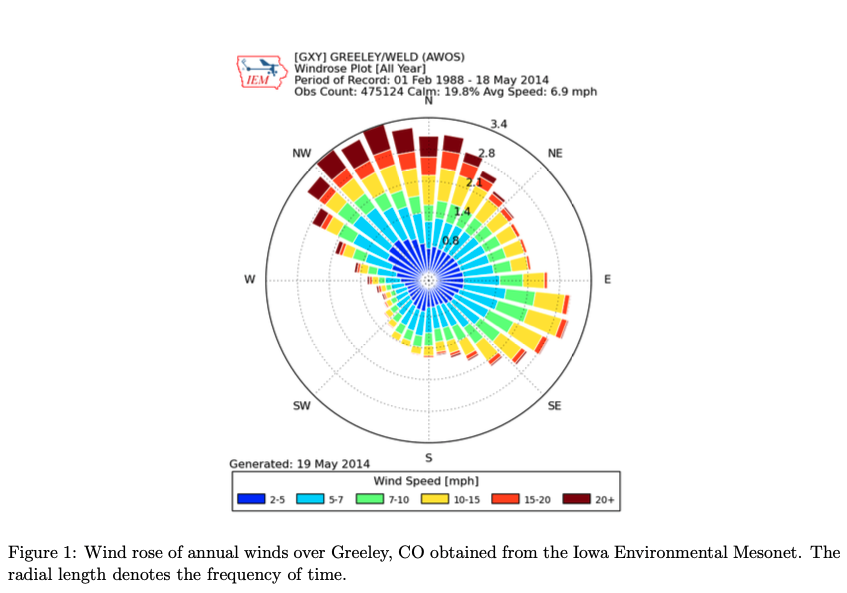

From Bayes theorem,
$Pr(W|0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta)=\frac{Pr(0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta|W)*Pr(W)}{Pr(0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta|W)*Pr(W)+ Pr(0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta|E)*Pr(E)}$.

We are given $\delta=0.01$, $Pr(W)=\gamma=0.40$, and $Pr(E)=1-\gamma=0.60$. To calculate $Pr(0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta|W)=0.03$ and $Pr(0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta|E)=0.06$, I used a z-test with $\overline{x}=0.13+\delta$ minus a z-test with $\overline{x}=0.13-\delta$.

Altogether, $Pr(W|0.13−\delta\leq \overline{C_{100}} \leq 0.13 + \delta)$=0.27. Thus, I will assume the winds came from the East.

In [ ]:
def get_bayesian_prob(gamma, C, delta=0.01, mean_w=0, mean_e=0.2, s_w=1, s_e=1, N=100):
  prob_W = gamma
  z_west1 = (C + delta - mean_w)/(s_w/np.sqrt(N))
  z_west2 = (C - delta - mean_w)/(s_w/np.sqrt(N))
  prob_C_given_W = stats.norm.cdf(z_west1)-stats.norm.cdf(z_west2)

  prob_E = 1-gamma
  z_east1 = (C + delta - mean_e)/(s_e/np.sqrt(N))
  z_east2 = (C - delta - mean_e)/(s_e/np.sqrt(N))
  prob_C_given_E = stats.norm.cdf(z_east1) - stats.norm.cdf(z_east2)
  return (prob_C_given_W*prob_W)/(prob_C_given_W*prob_W+prob_C_given_E*prob_E)

In [ ]:
print(get_bayesian_prob(gamma=0.4, C=0.13))

0.26825987838936866


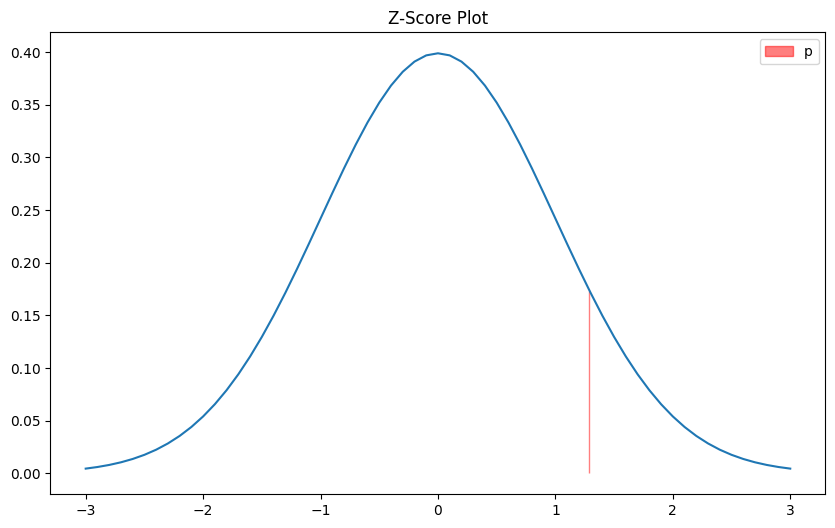

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.arange(-3, 3.1, 0.1)
x1 = np.arange(1.3-0.01, 1.3+0.01, 0.1)
ax.plot(x, stats.norm.pdf(x, loc=0, scale=1))
ax.fill_between(x1, stats.norm.pdf(x1, loc=0, scale=1), np.zeros(len(x1)), color='r', alpha=0.5, label='p')
ax.legend()
ax.set_title('Z-Score Plot');

### Part (c)
You will now explore the sensitivity of your results to the parameter $\gamma$. That is, you want to understand
what would happen if your climatological wind fraction $\gamma$ was different (say, if you repeated this analysis in
a different location). Thus, your final result will be a single plot showing how often the z/t-statistic from
Part (a) guesses the wind direction correctly and how often the Bayes formulation from Part (b) guesses the
wind direction correctly as a function of $\gamma$, where $\gamma$ takes on values between 0 and 1.

Explain your results and what they imply about the two different methods. Be sure to specifically discuss
the behavior in the limits of large and small $\gamma$.

**Hint:** To set up this problem, you will design and run Monte Carlo experiments to simulate this physical situation. Write
code for each of the two scenarios, “winds from the east” and “winds from the west”. Then randomly choose which
scenario (i.e. from the west or from the east) to run according to the probability $\gamma$ (there are many ways to do this).
Next, average N=100 values from the underlying distribution, and calculate a $\overline{C_{N}}$. Next, use the methods from (a)
and (b) to calculate whether the t-test and Bayesian approach say the wind was from the west given the $\overline{C_{N}}$ you
calculated. Finally, compare what the t-test and Bayesian approaches said to the truth (the truth is the scenario
that you actually used to get $\overline{C_{N}}$), and keep track of how often each method guesses the correct scenario.

In [ ]:
gammas = np.arange(0, 1.05, 0.05)

In [ ]:
def sample_ave_winds_from_east(N=100):
  samples = np.random.normal(loc=0.2, scale=1, size=N)
  return samples.mean()

In [ ]:
def sample_ave_winds_from_west(N=100):
  samples = np.random.normal(loc=0, scale=1, size=N)
  return samples.mean()

In [ ]:
def compare_methods(experiments=10_000, N=100):
  f_right = 0.0*np.zeros(len(gammas))
  b_right = np.zeros_like(f_right)

  for i in range(experiments):
    for gamma in gammas:
      west = np.random.choice([True, False], p=[gamma, 1-gamma])
      if west:
        C = sample_ave_winds_from_west(N)
      else:
        C = sample_ave_winds_from_east(N)

      # Frequentist approach
      f_prob = get_freq_prob(C)
      if f_prob >= 0.05:
        f_west = True
      else:
        f_west = False

      if f_west == west:
        f_right[int(gamma/0.05)] += 1

      # Bayesian approach
      b_prob = get_bayesian_prob(gamma, C)
      if b_prob >= 0.5:
        b_west = True
      else:
        b_west = False

      if b_west == west:
        b_right[int(gamma/0.05)] += 1

  return f_right/experiments, b_right/experiments

In [ ]:
f_right_norm, b_right_norm = compare_methods()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=300)
plt.plot(gammas, f_right_norm, label='Frequentist')
plt.plot(gammas, b_right_norm, label='Bayesian')
plt.xlabel('$\gamma$')
plt.ylabel('Percent correct')
plt.legend()
plt.title('Frequentist vs Bayesian');
plt.savefig('fig3.png')